First Graph: Importing Relevant Classes

In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

In [2]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from langchain_openai.chat_models import AzureChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_core.runnables import Runnable
from collections.abc import Sequence

In [3]:
class State(TypedDict):
    messages: Sequence[BaseMessage]

In [4]:
state = State(messages=[HumanMessage("Could you tell me why birds can fly?")])

In [5]:
state

{'messages': [HumanMessage(content='Could you tell me why birds can fly?', additional_kwargs={}, response_metadata={})]}

In [6]:
state["messages"][0].pretty_print()

================================ Human Message =================================

Could you tell me why birds can fly?


In [7]:
chat = AzureChatOpenAI(
    azure_deployment="gpt-4o",
    api_version="2025-01-01-preview",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=6
)

In [8]:
res = chat.invoke(state["messages"])
res.pretty_print()

================================== Ai Message ==================================

Of course! Birds can fly due to a combination of specialized physical adaptations, evolutionary traits, and the principles of aerodynamics. Here are the key reasons why birds are capable of flight:

### 1. **Wing Shape and Aerodynamics**
   - Birds' wings are shaped like airfoils, meaning they are curved on top and flatter on the bottom. This shape allows air to move faster over the top of the wing and slower underneath, creating **lift**, which counteracts gravity and allows the bird to rise into the air.

### 2. **Lightweight Bodies**
   - Birds have evolved lightweight skeletons with hollow bones (pneumatized bones) that reduce their overall body weight without sacrificing strength. This makes it easier for them to stay aloft.
   - They also lack heavy structures like teeth, instead having lightweight beaks.

### 3. **Powerful Flight Muscles**
   - Birds have strong flight muscles, particularly the **p

In [13]:
def chatbot(state: State) -> State:
    res = chat.invoke(state["messages"])
    res.pretty_print()
    return State(messages=[res])

In [14]:
chatbot(state)

================================== Ai Message ==================================

Certainly! Birds can fly due to a combination of specialized physical adaptations, evolutionary traits, and the principles of aerodynamics. Here are the key reasons why birds are capable of flight:

### 1. **Lightweight Bodies**
   - Birds have lightweight skeletons with hollow bones (pneumatized bones) that reduce their overall body weight without sacrificing strength.
   - They lack heavy structures like teeth, and instead, they have beaks made of keratin, which are much lighter.

### 2. **Feathers**
   - Feathers are crucial for flight. They are lightweight, strong, and flexible, providing the necessary surface area for lift and thrust.
   - Flight feathers, especially on the wings and tail, are designed to create lift and help with steering and balance.

### 3. **Wing Shape and Aerodynamics**
   - Bird wings are shaped like airfoils, with a curved upper surface and a flatter lower surface. This shape 

{'messages': [AIMessage(content="Certainly! Birds can fly due to a combination of specialized physical adaptations, evolutionary traits, and the principles of aerodynamics. Here are the key reasons why birds are capable of flight:\n\n### 1. **Lightweight Bodies**\n   - Birds have lightweight skeletons with hollow bones (pneumatized bones) that reduce their overall body weight without sacrificing strength.\n   - They lack heavy structures like teeth, and instead, they have beaks made of keratin, which are much lighter.\n\n### 2. **Feathers**\n   - Feathers are crucial for flight. They are lightweight, strong, and flexible, providing the necessary surface area for lift and thrust.\n   - Flight feathers, especially on the wings and tail, are designed to create lift and help with steering and balance.\n\n### 3. **Wing Shape and Aerodynamics**\n   - Bird wings are shaped like airfoils, with a curved upper surface and a flatter lower surface. This shape allows air to move faster over the top

In [15]:
graph = StateGraph(State)

In [16]:
graph.add_node("chatbot", chatbot)
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

In [17]:
graph_compiled = graph.compile()

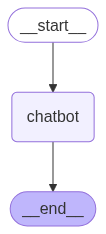

In [18]:
graph_compiled

TEST GRAPH

In [19]:
graph_compiled.invoke(state)

================================== Ai Message ==================================

Certainly! Birds can fly due to a combination of unique physical adaptations, biological features, and behaviors that enable them to overcome gravity and generate lift. Here are the key reasons why birds can fly:

### 1. **Wing Structure and Shape**
   - Birds have wings that are specially designed for flight. The shape of their wings, known as an **airfoil**, allows air to move faster over the top of the wing and slower underneath. This difference in air pressure creates **lift**, which helps birds rise into the air.
   - The curvature of the wing and the angle at which it is held (called the **angle of attack**) are crucial for generating lift.

### 2. **Feathers**
   - Feathers are lightweight and strong, providing the necessary surface area for flight. They are arranged in a way that minimizes air resistance and maximizes lift.
   - Flight feathers on the wings and tail help birds control their direct

{'messages': [AIMessage(content='Certainly! Birds can fly due to a combination of unique physical adaptations, biological features, and behaviors that enable them to overcome gravity and generate lift. Here are the key reasons why birds can fly:\n\n### 1. **Wing Structure and Shape**\n   - Birds have wings that are specially designed for flight. The shape of their wings, known as an **airfoil**, allows air to move faster over the top of the wing and slower underneath. This difference in air pressure creates **lift**, which helps birds rise into the air.\n   - The curvature of the wing and the angle at which it is held (called the **angle of attack**) are crucial for generating lift.\n\n### 2. **Feathers**\n   - Feathers are lightweight and strong, providing the necessary surface area for flight. They are arranged in a way that minimizes air resistance and maximizes lift.\n   - Flight feathers on the wings and tail help birds control their direction, speed, and stability during flight.\